In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

#### Ελάχιστες ημερήσιες θερμοκρασίες που παρατηρήθηκαν στη Μελβούρνη από 01-01-1981 μέχρι 31-12-1990

In [2]:
dataset = pd.read_csv('min_temp.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
dataset

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]

In [4]:
dataset = dataset.rename(columns={'Temp':'Y_t'})

(-5.0, 30.0)

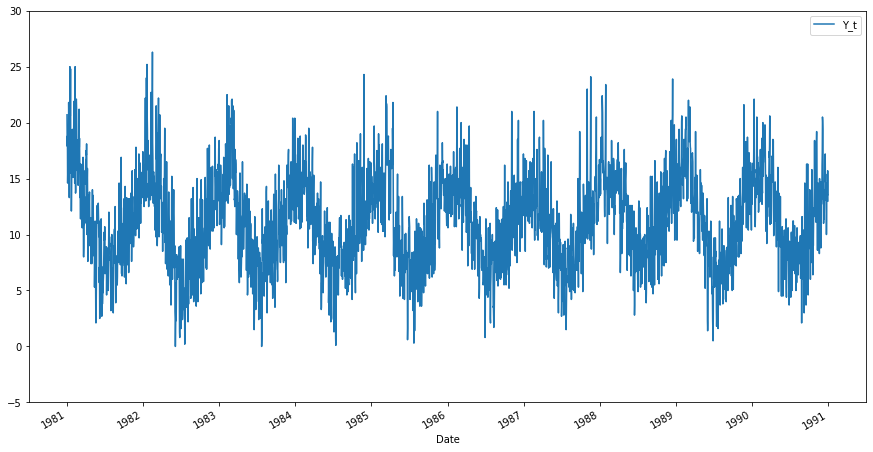

In [5]:
dataset.plot(figsize=(15,8))
plt.ylim((-5,30))

In [6]:
dataset

Y_t
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]

In [7]:
dataset['Y_t'].shift(2)

Date
1981-01-01     NaN
1981-01-02     NaN
1981-01-03    20.7
1981-01-04    17.9
1981-01-05    18.8
              ... 
1990-12-27    12.9
1990-12-28    14.6
1990-12-29    14.0
1990-12-30    13.6
1990-12-31    13.5
Name: Y_t, Length: 3650, dtype: float64

In [8]:
dataset['Y_(t-1)'] = dataset['Y_t'].shift(1)
dataset['Y_(t-2)'] = dataset['Y_t'].shift(2)

In [9]:
dataset

Y_t  Y_(t-1)  Y_(t-2)
Date                              
1981-01-01  20.7      NaN      NaN
1981-01-02  17.9     20.7      NaN
1981-01-03  18.8     17.9     20.7
1981-01-04  14.6     18.8     17.9
1981-01-05  15.8     14.6     18.8
...          ...      ...      ...
1990-12-27  14.0     14.6     12.9
1990-12-28  13.6     14.0     14.6
1990-12-29  13.5     13.6     14.0
1990-12-30  15.7     13.5     13.6
1990-12-31  13.0     15.7     13.5

[3650 rows x 3 columns]

#### Χωρισμός του dataset σε training και testing set

##### training -> 01-01-1981 μέχρι 21-12-1990
##### testing -> 22-12-1990 μέχρι 31-12-1990

In [10]:
pd.DataFrame(dataset[3:3640])


Y_t  Y_(t-1)  Y_(t-2)
Date                              
1981-01-04  14.6     18.8     17.9
1981-01-05  15.8     14.6     18.8
1981-01-06  15.8     15.8     14.6
1981-01-07  15.8     15.8     15.8
1981-01-08  17.4     15.8     15.8
...          ...      ...      ...
1990-12-17  13.9     13.6     13.4
1990-12-18  17.2     13.9     13.6
1990-12-19  14.7     17.2     13.9
1990-12-20  15.4     14.7     17.2
1990-12-21  13.1     15.4     14.7

[3637 rows x 3 columns]

In [11]:
pd.DataFrame(dataset[3640::])

Y_t  Y_(t-1)  Y_(t-2)
Date                              
1990-12-22  13.2     13.1     15.4
1990-12-23  13.9     13.2     13.1
1990-12-24  10.0     13.9     13.2
1990-12-25  12.9     10.0     13.9
1990-12-26  14.6     12.9     10.0
1990-12-27  14.0     14.6     12.9
1990-12-28  13.6     14.0     14.6
1990-12-29  13.5     13.6     14.0
1990-12-30  15.7     13.5     13.6
1990-12-31  13.0     15.7     13.5

In [12]:
training_set = pd.DataFrame(dataset[3:3640])
testing_set = pd.DataFrame(dataset[3640::])
# training_set = training_set.drop(dataset.index[[0,1]])

In [13]:
training_set

Y_t  Y_(t-1)  Y_(t-2)
Date                              
1981-01-04  14.6     18.8     17.9
1981-01-05  15.8     14.6     18.8
1981-01-06  15.8     15.8     14.6
1981-01-07  15.8     15.8     15.8
1981-01-08  17.4     15.8     15.8
...          ...      ...      ...
1990-12-17  13.9     13.6     13.4
1990-12-18  17.2     13.9     13.6
1990-12-19  14.7     17.2     13.9
1990-12-20  15.4     14.7     17.2
1990-12-21  13.1     15.4     14.7

[3637 rows x 3 columns]

In [14]:
testing_set

Y_t  Y_(t-1)  Y_(t-2)
Date                              
1990-12-22  13.2     13.1     15.4
1990-12-23  13.9     13.2     13.1
1990-12-24  10.0     13.9     13.2
1990-12-25  12.9     10.0     13.9
1990-12-26  14.6     12.9     10.0
1990-12-27  14.0     14.6     12.9
1990-12-28  13.6     14.0     14.6
1990-12-29  13.5     13.6     14.0
1990-12-30  15.7     13.5     13.6
1990-12-31  13.0     15.7     13.5

#### Συντελεστής γραμμικής συσχέτισης για το training set

In [15]:
training_set.corr()

Y_t   Y_(t-1)   Y_(t-2)
Y_t      1.000000  0.774558  0.630640
Y_(t-1)  0.774558  1.000000  0.774748
Y_(t-2)  0.630640  0.774748  1.000000

<AxesSubplot:xlabel='Y_(t-2)', ylabel='Y_(t-1)'>

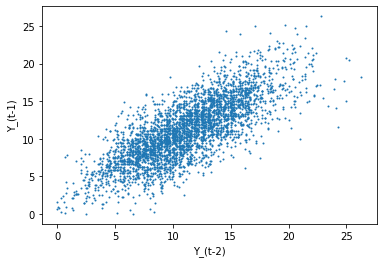

In [16]:
training_set.plot.scatter(x='Y_(t-2)', y='Y_(t-1)',s=1)

#### Αυτοπαλινδρομικό μοντέλο 2ης τάξης AR(2)

$$Y_t = A + B^{(1)} Y_{t−1} + B^{(2)} Y_{t−2} + \epsilon_t$$

In [17]:
model = linear_model.LinearRegression()
X = training_set[['Y_(t-2)','Y_(t-1)']]
y = training_set['Y_t']
model.fit(X,y)

LinearRegression()

In [18]:
model.coef_

array([0.07637309, 0.71502421])

In [19]:
X = testing_set[['Y_(t-2)','Y_(t-1)']]
testing_set['pr1'] = model.predict(X)
print(testing_set)

             Y_t  Y_(t-1)  Y_(t-2)        pr1
Date                                         
1990-12-22  13.2     13.1     15.4  12.870713
1990-12-23  13.9     13.2     13.1  12.766557
1990-12-24  10.0     13.9     13.2  13.274712
1990-12-25  12.9     10.0     13.9  10.539578
1990-12-26  14.6     12.9     10.0  12.315294
1990-12-27  14.0     14.6     12.9  13.752317
1990-12-28  13.6     14.0     14.6  13.453136
1990-12-29  13.5     13.6     14.0  13.121303
1990-12-30  15.7     13.5     13.6  13.019251
1990-12-31  13.0     15.7     13.5  14.584667


(5.0, 25.0)

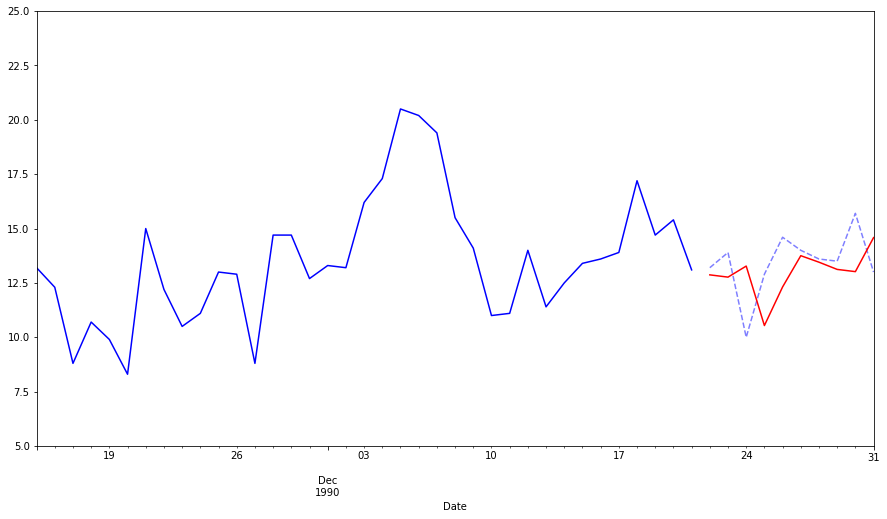

In [20]:
plt.figure(figsize=(15,8))
training_set['Y_t'][3600:].plot(c='blue')
testing_set['Y_t'].plot(c='blue',alpha=0.5, style=['--'])
testing_set['pr1'].plot(c='red')
#testing_set['pr2'].plot(c='magenta')
plt.ylim((5,25))

(5.0, 25.0)

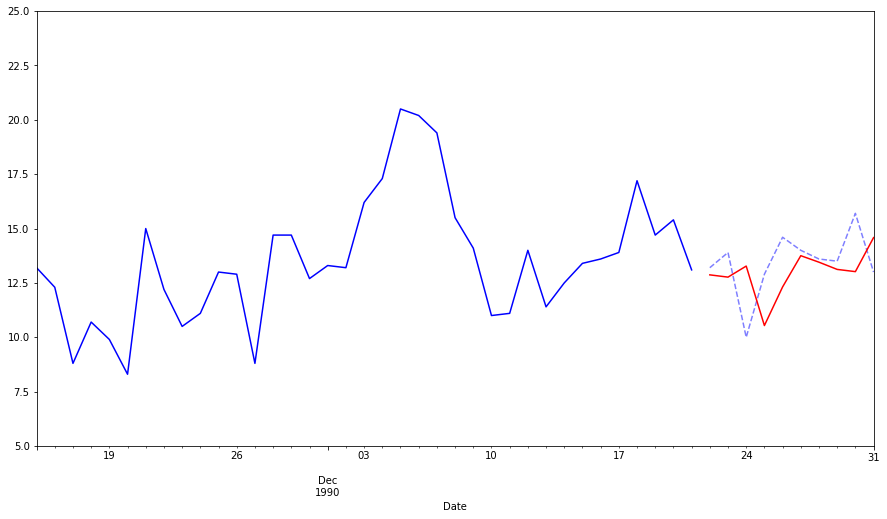

In [21]:
plt.figure(figsize=(15,8))
training_set['Y_t'][3600:].plot(c='blue')
testing_set['Y_t'].plot(c='blue',alpha=0.5, style=['--'])
testing_set['pr1'].plot(c='red')
#testing_set['pr2'].plot(c='magenta')
plt.ylim((5,25))

##### Υπολογισμός του συντελεστή μερικής αυτοσυσχέτισης PACF(2)

$$Y_t = A_1 + B_1 Y_{t−1} + (\epsilon_1 )_t$$
$$\hat y_t = a_1 + b_1 y_{t−1}$$

In [22]:
X = training_set[['Y_(t-1)']] # black box
y = training_set['Y_t']
model.fit(X,y)
model.coef_

array([0.77420758])

In [23]:
training_set['pr_Y_t|Y_(t-1)'] = model.predict(X)
training_set['e_pr_Y_t|Y_(t-1)'] = training_set['Y_t'] - training_set['pr_Y_t|Y_(t-1)']

In [24]:
training_set

Y_t  Y_(t-1)  Y_(t-2)  pr_Y_t|Y_(t-1)  e_pr_Y_t|Y_(t-1)
Date                                                                
1981-01-04  14.6     18.8     17.9       17.074855         -2.474855
1981-01-05  15.8     14.6     18.8       13.823183          1.976817
1981-01-06  15.8     15.8     14.6       14.752232          1.047768
1981-01-07  15.8     15.8     15.8       14.752232          1.047768
1981-01-08  17.4     15.8     15.8       14.752232          2.647768
...          ...      ...      ...             ...               ...
1990-12-17  13.9     13.6     13.4       13.048976          0.851024
1990-12-18  17.2     13.9     13.6       13.281238          3.918762
1990-12-19  14.7     17.2     13.9       15.836123         -1.136123
1990-12-20  15.4     14.7     17.2       13.900604          1.499396
1990-12-21  13.1     15.4     14.7       14.442549         -1.342549

[3637 rows x 5 columns]

In [25]:
X = training_set[['Y_(t-1)']]
y = training_set['Y_(t-2)']
model.fit(X,y)

LinearRegression()

In [26]:
model.coef_

array([0.77492437])

$$Y_{t-2} = A_2 + B_2 Y_{t−1} + (\epsilon_2 )_{t-2}$$
$$\hat y_{t-1} = a_2 + b_2 y_{t−1}$$

In [27]:
training_set['pr_Y_(t-2)|Y_(t-1)'] = model.predict(X)
training_set['e_pr_Y_(t-2)|Y_(t-1)'] = training_set['Y_(t-2)'] - training_set['pr_Y_(t-2)|Y_(t-1)']

In [28]:
training_set

Y_t  Y_(t-1)  Y_(t-2)  pr_Y_t|Y_(t-1)  e_pr_Y_t|Y_(t-1)  \
Date                                                                   
1981-01-04  14.6     18.8     17.9       17.074855         -2.474855   
1981-01-05  15.8     14.6     18.8       13.823183          1.976817   
1981-01-06  15.8     15.8     14.6       14.752232          1.047768   
1981-01-07  15.8     15.8     15.8       14.752232          1.047768   
1981-01-08  17.4     15.8     15.8       14.752232          2.647768   
...          ...      ...      ...             ...               ...   
1990-12-17  13.9     13.6     13.4       13.048976          0.851024   
1990-12-18  17.2     13.9     13.6       13.281238          3.918762   
1990-12-19  14.7     17.2     13.9       15.836123         -1.136123   
1990-12-20  15.4     14.7     17.2       13.900604          1.499396   
1990-12-21  13.1     15.4     14.7       14.442549         -1.342549   

            pr_Y_(t-2)|Y_(t-1)  e_pr_Y_(t-2)|Y_(t-1)  
Date                                                  
1981-01-04           17.082581              0.817419  
1981-01-05           13.827899              4.972101  
1981-01-06           14.757808             -0.157808  
1981-01-07           14.757808              1.042192  
1981-01-08           14.757808              1.042192  
...                        ...                   ...  
1990-12-17           13.052974              0.347026  
1990-12-18           13.285452              0.314548  
1990-12-19           15.842702             -1.942702  
1990-12-20           13.905391              3.294609  
1990-12-21           14.447838              0.252162  

[3637 rows x 7 columns]

In [29]:
training_set[['e_pr_Y_t|Y_(t-1)', 'e_pr_Y_(t-2)|Y_(t-1)']].corr()

e_pr_Y_t|Y_(t-1)  e_pr_Y_(t-2)|Y_(t-1)
e_pr_Y_t|Y_(t-1)              1.000000              0.076397
e_pr_Y_(t-2)|Y_(t-1)          0.076397              1.000000

In [30]:
from statsmodels.tsa.stattools import pacf
print(pacf(dataset['Y_t'][:3640], nlags=10))

[1.         0.77454064 0.07667323 0.18903945 0.15209657 0.12980496
 0.11015613 0.10214422 0.07452041 0.07049043 0.03490694]
